In [7]:
using DelimitedFiles
using CairoMakie

include("../../Modules/TestingFunctions.jl")
using .TestingFunctions

In [8]:
lo_train = vec(readdlm(joinpath(@__DIR__, "..", "..", "Data", "lorenz_train_0_05.txt")))
lo_test = vec(readdlm(joinpath(@__DIR__, "..", "..", "Data", "lorenz_test_0_05.txt")))

10001-element Vector{Float64}:
  -0.7081105746641868
  -1.0655725978683848
  -1.632156366355012
  -2.547045618142249
  -4.02751892253803
  -6.378718286912411
  -9.869360162880017
 -14.133670318936842
 -17.00902718809827
 -15.472867332316168
   ⋮
  13.755412712722647
  10.388651793674478
   6.563100105282945
   3.6436064205554284
   1.850372101320824
   0.89044579875696
   0.42713652720890416
   0.22641853703532017
   0.15695046818267286

In [9]:
testing_params = create_testing_params(
    readout_switching = true
)

TestingParameters(false, false, false, true)

Created reservoir of size: (400,)


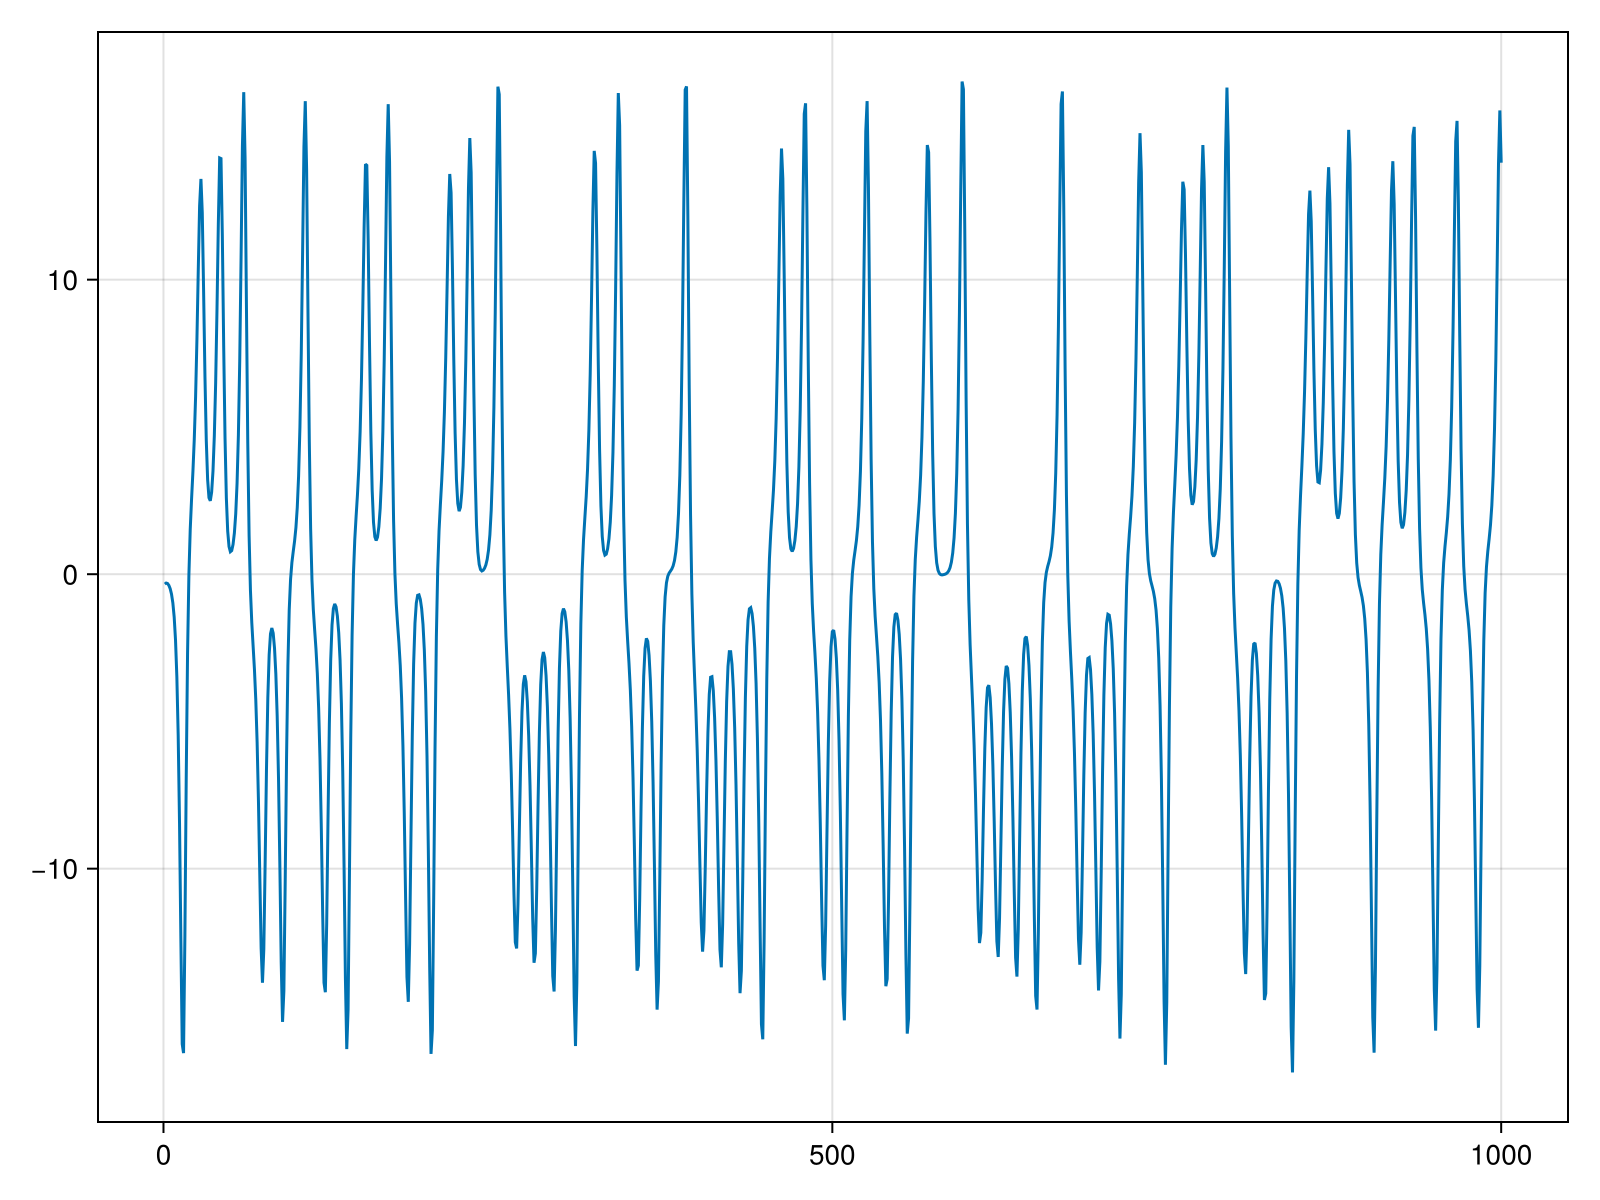

In [10]:
# preds = create_pred_for_params_free_run(lo_train, 100, 3; k = 400, testing_params=testing_params)
preds = create_pred_for_params_multi_step(lo_train, lo_test, 3, 1000; k = 400, testing_params=testing_params)
fig = quick_graph_series(preds[1:1000])

CairoMakie.save("readout_switching_freerun.pdf", fig)

fig

Created reservoir of size: (400,)
Created reservoir of size: (400,)
Overall RMSE:
    Vanilla: 10.895235370934394
    Ordinal network reservoir: 6.173608907699142
Turning partition RMSE:
    Vanilla: 11.180327225266668
    Ordinal network reservoir: 5.499046817706397


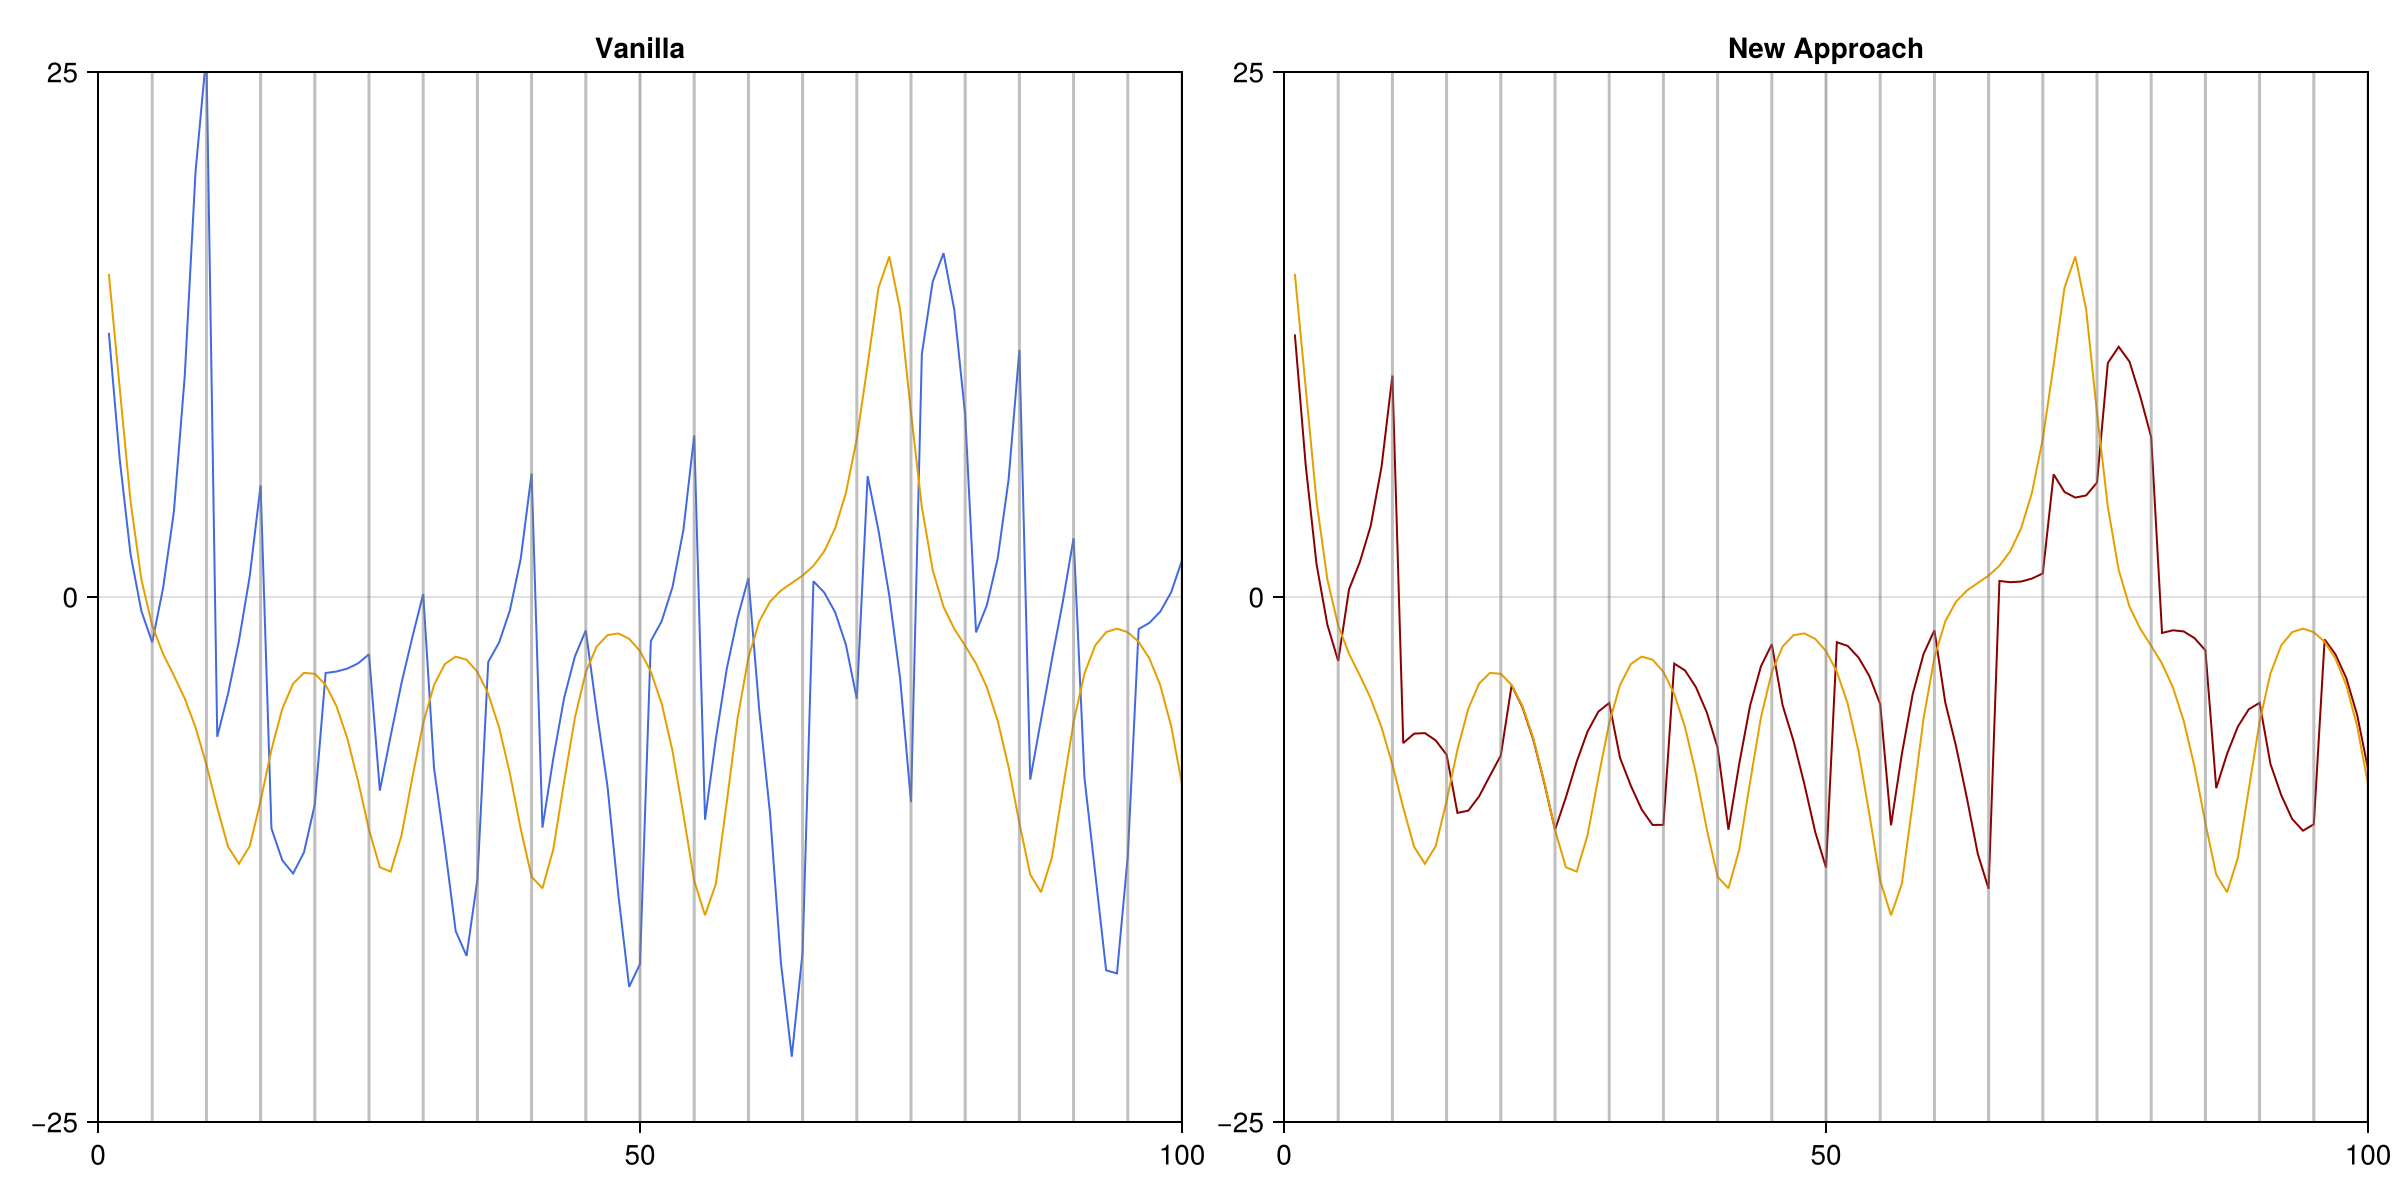

In [11]:
fig = test_multi_step(lo_train, lo_test, 3, 400; n_steps=5, from=0, to=100, equal_total_k=false, testing_params=testing_params)

CairoMakie.save("readout_switching_multistep.pdf", fig)

fig

Created reservoir of size: (400,)


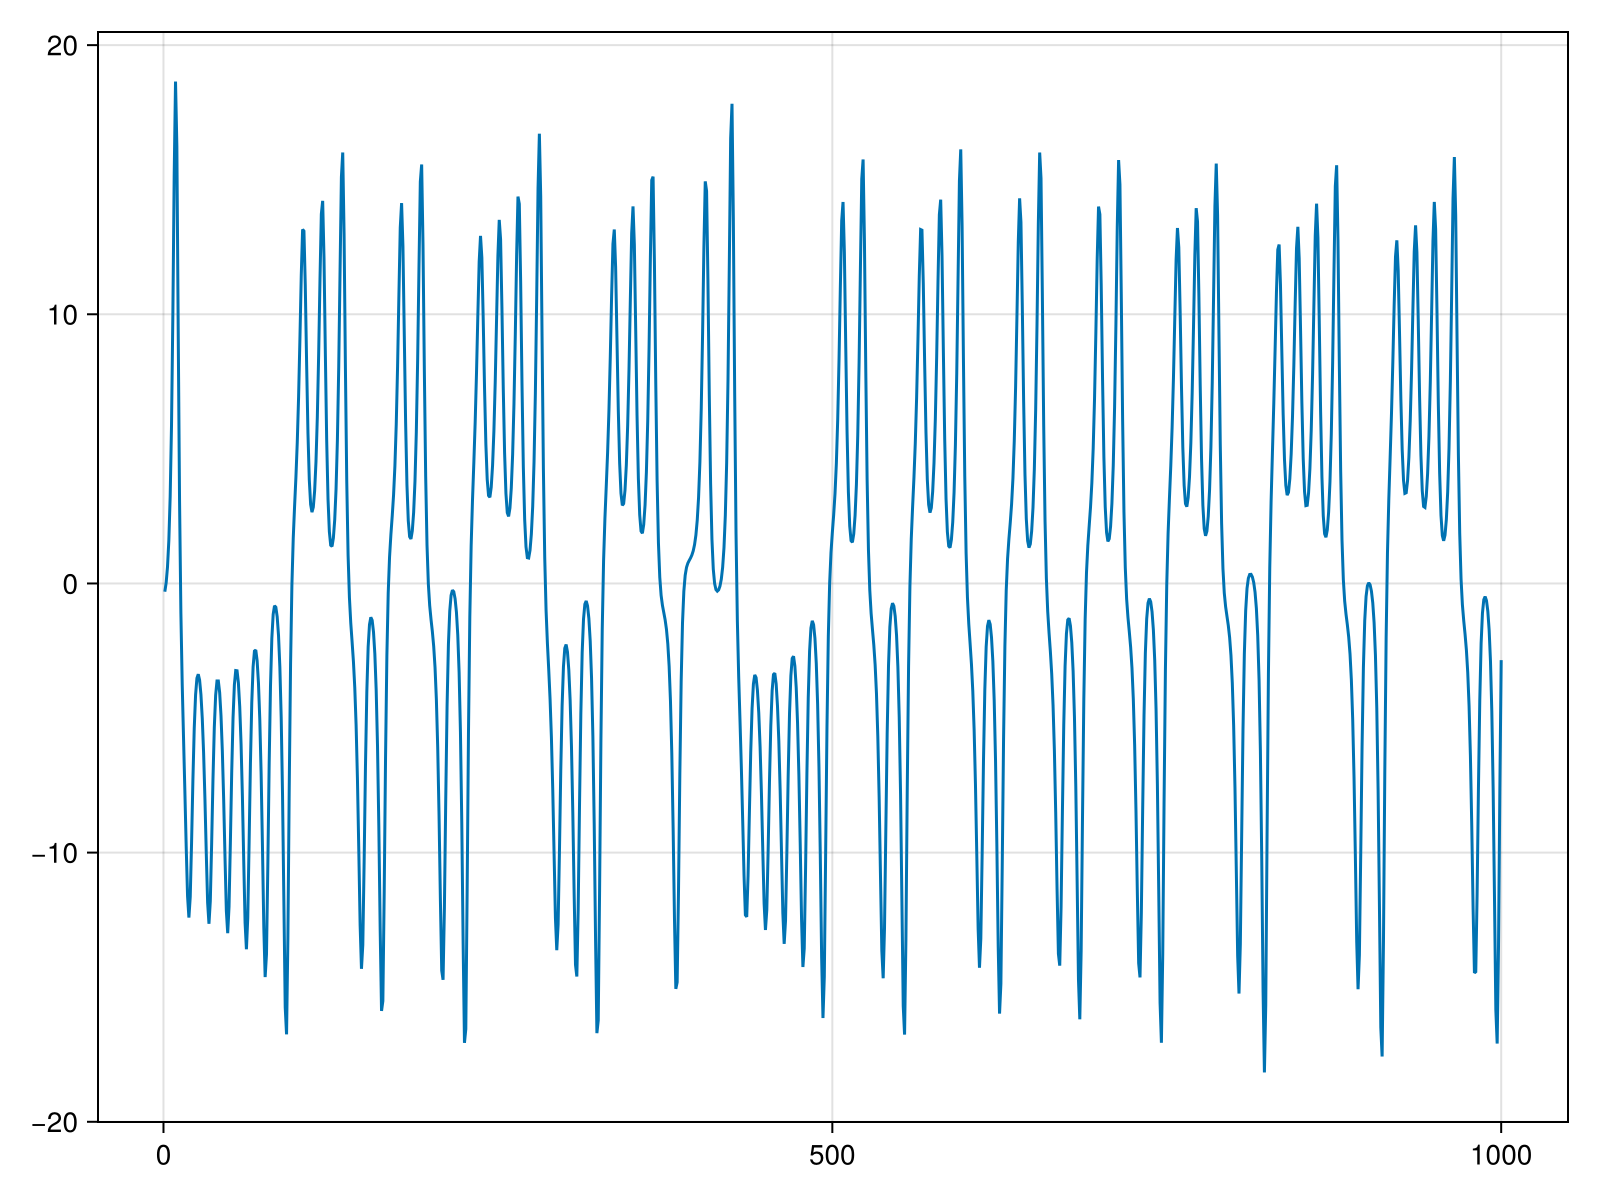

In [12]:
# preds = create_pred_for_params_free_run(lo_train, 100, 3; k = 400, testing_params=testing_params)
preds = create_pred_for_params_multi_step(lo_train, lo_test, 1, 1000; k = 400, testing_params=testing_params)
fig = quick_graph_series(preds[1:1000])

# CairoMakie.save("vanilla_freerun.pdf", fig)

fig